# 1. Define the problem
### Employee turnover is a natural part of business in any industry. Excessive turnover decreases the overall efficiency of the company and comes with a high price tag. Understanding the effects of losing a high number of employees serves as a motivator to work toward reducing the turnover rate for higher profits and a more appealing work environment

## Cost incurred:

It’s well-known that employee turnover rates come as a high cost to companies, however very few discuss the true extended costs  and the multiple ways that it impacts the business. It’s important that successful business not only find the best employees, but keep them engaged as well. In one of my most recent articles, we discussed losing a Millennial employee can costs the company USD15,000 to USD25,000, but it’s actually a lot more when you weigh in a few additional variables.

First, let’s take a look at the hard costs of high turnover. What is a company going to spend in order to compensate for low retention rates? According to a study by the Society for Human Resource Management, employers will need to spend the equivalent of six to nine months of an employee’s salary in order to find and train their replacement. Doing the math, that means that for an employee salaried at USD60,000 will cost the company anywhere from USD30,000 to USD45,000 to hire and train a replacement. Other research show that the average costs could be even higher.  In a study conducted by the Center for America Progress, the cost of losing an employee can cost anywhere from 16% of their salary for hourly, unsalaried employees, to 213% of the salary for a highly trained position! So if a high trained executive is making USD120,000 a year, the true loss could be up to USD255,600 to the company!

(https://www.huffingtonpost.com/julie-kantor/high-turnover-costs-way-more-than-you-think_b_9197238.html)

## 2. Obtain data
### Import the necessary packages and import the data

In [3]:
import os
print(os.getcwd())

C:\Users\ravi\Downloads


In [6]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")
import warnings
warnings.filterwarnings("ignore")
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,roc_auc_score,f1_score,accuracy_score, classification_report, precision_score, recall_score, confusion_matrix, precision_recall_curve
#from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,ExtraTreesClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import xgboost as xgb
data = pd.read_csv('WWA_Fn-UseC_-HR-Employee-Attrition.csv')

# Any results you write to the current directory are saved as output.

ModuleNotFoundError: No module named 'xgboost'

## 3. Clean the data

In [5]:
data.shape

NameError: name 'data' is not defined

There are total of 1470 rows and 35 columns

In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

In [80]:
data.isnull().any().sum()

0

#### There are no null or missing values in any of the columns

In [81]:
data.describe(include='all')

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470,1470,1470.000000,1470,1470.000000,1470.000000,1470,1470.0,1470.000000,1470.000000,1470,1470.000000,1470.000000,1470.000000,1470,1470.000000,1470,1470.000000,1470.000000,1470.000000,1470,1470,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
unique,NaN,2,3,NaN,3,NaN,NaN,6,NaN,NaN,NaN,2,NaN,NaN,NaN,9,NaN,3,NaN,NaN,NaN,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,No,Travel_Rarely,NaN,Research & Development,NaN,NaN,Life Sciences,NaN,NaN,NaN,Male,NaN,NaN,NaN,Sales Executive,NaN,Married,NaN,NaN,NaN,Y,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1233,1043,NaN,961,NaN,NaN,606,NaN,NaN,NaN,882,NaN,NaN,NaN,326,NaN,673,NaN,NaN,NaN,1470,1054,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,36.923810,NaN,NaN,802.485714,NaN,9.192517,2.912925,NaN,1.0,1024.865306,2.721769,NaN,65.891156,2.729932,2.063946,NaN,2.728571,NaN,6502.931293,14313.103401,2.693197,NaN,NaN,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,NaN,NaN,403.509100,NaN,8.106864,1.024165,NaN,0.0,602.024335,1.093082,NaN,20.329428,0.711561,1.106940,NaN,1.102846,NaN,4707.956783,7117.786044,2.498009,NaN,NaN,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,NaN,NaN,102.000000,NaN,1.000000,1.000000,NaN,1.0,1.000000,1.000000,NaN,30.000000,1.000000,1.000000,NaN,1.000000,NaN,1009.000000,2094.000000,0.000000,NaN,NaN,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,NaN,NaN,465.000000,NaN,2.000000,2.000000,NaN,1.0,491.250000,2.000000,NaN,48.000000,2.000000,1.000000,NaN,2.000000,NaN,2911.000000,8047.000000,1.000000,NaN,NaN,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,NaN,NaN,802.000000,NaN,7.000000,3.000000,NaN,1.0,1020.500000,3.000000,NaN,66.000000,3.000000,2.000000,NaN,3.000000,NaN,4919.000000,14235.500000,2.000000,NaN,NaN,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,NaN,NaN,1157.000000,NaN,14.000000,4.000000,NaN,1.0,1555.750000,4.000000,NaN,83.750000,3.000000,3.000000,NaN,4.000000,NaN,8379.000000,20461.500000,4.000000,NaN,NaN,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000


### Removal of unecessary columns

In [82]:
data.drop(['StandardHours','EmployeeCount','EmployeeNumber','Over18'],axis=1,inplace=True)

## 4. Explore the data

### First plot the correlation matrix

In [83]:
data.groupby(by='Attrition').agg('mean')
data['Attrition_num'] = data['Attrition'].map({"No":0,"Yes":1})

#### Variables like Age, Daily rate, Monthly income, stock option, total working hours seems to have a significant impact on the Attition than the other variables

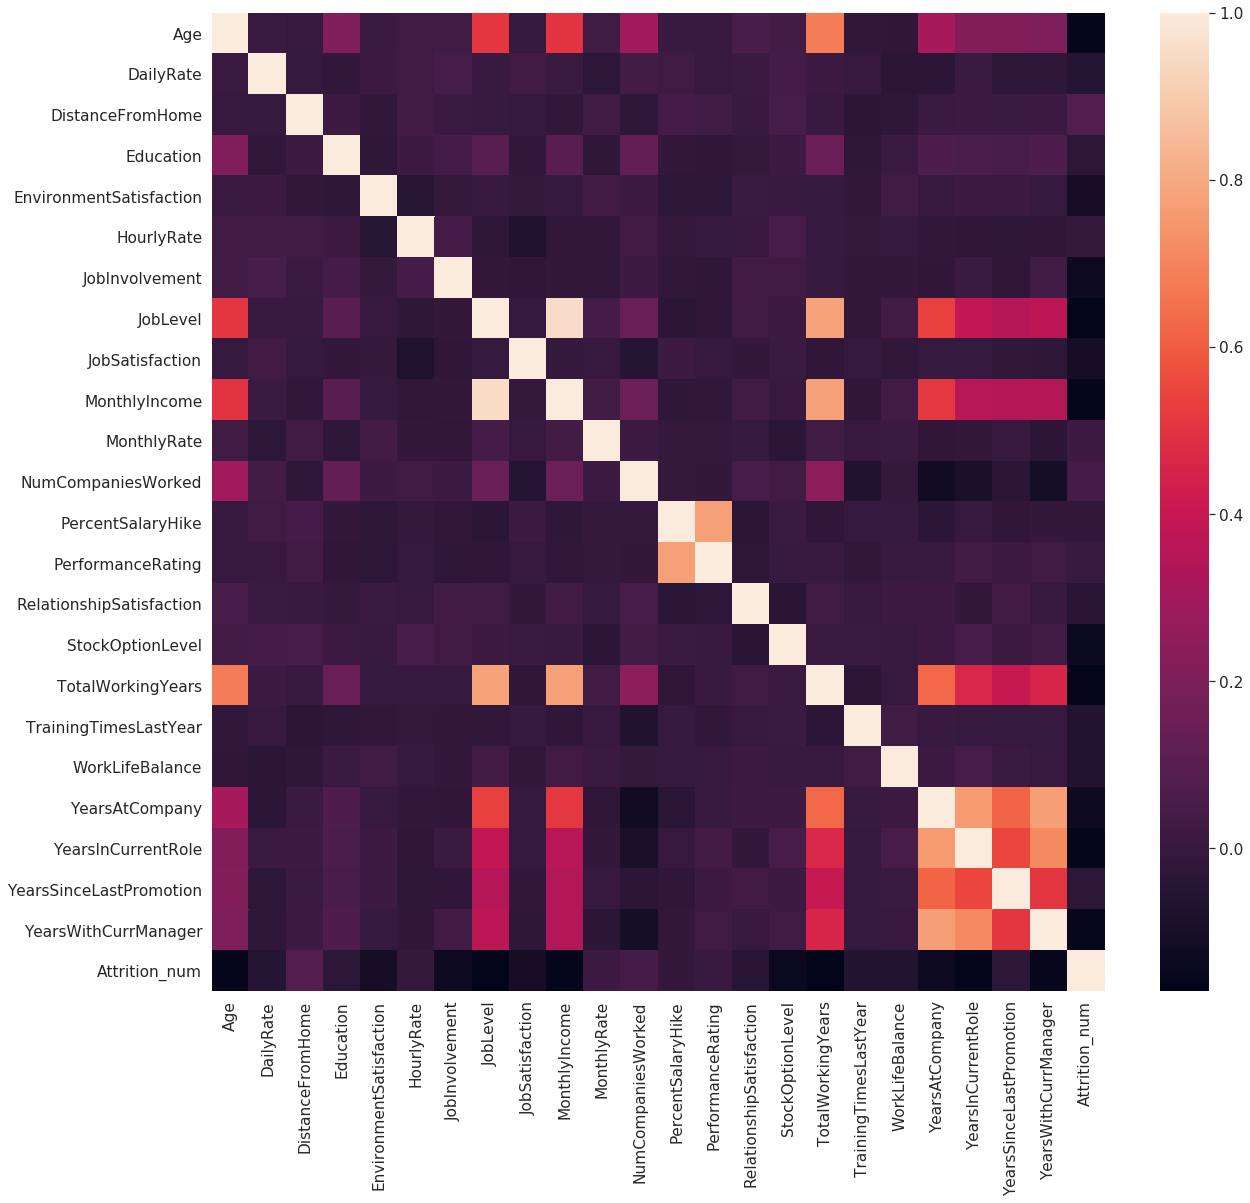

In [84]:
corr = data.corr()
fig = plt.figure(figsize=(20,18))
sns.set(font_scale=1.4)
sns.heatmap(data=corr,annot=False)

In [85]:

data.drop(['YearsInCurrentRole','YearsWithCurrManager'],axis=1,inplace=True)

In [86]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'Attrition_num'],
      dtype='object')

### There are a few correlated features : 
#### 1. Years in current role, Years since last promotion, Years with current manager and Years at company. 
#### 2. The above four features with the Job level, Monthly income and total working hours
#### 3. Performance rating and percentage hike
#### 4. Monthly income and job level



#### Find the number of unique values in each features to distinguish between numeric and non numeric features

#### Fix a threshold of unique values >10 and <10 for numeric and categorical features respectively

In [87]:
numeric_features = [i for i in data.columns if data[i].nunique()>=10 and i!="Attrition"]
count_features = [i for i in data.columns if data[i].nunique()<10 and i!="Attrition"]
numeric_features_pair = [i for i in data.columns if data[i].nunique()>=10 or i=="Attrition"]

In [88]:
data['Attrition'].value_counts(normalize=True)*100

No     83.877551
Yes    16.122449
Name: Attrition, dtype: float64

#### Distribution of target variable: 83% No and 16% Yes. Quite an imbalance!!



#### Function for eda for numeric and non numeric features

In [89]:
def eda_for_features(feature,data):
    
    if feature in numeric_features:
        fig,ax = plt.subplots(1,2,figsize=(10,5),gridspec_kw={'width_ratios':[2,1]})
        sns.kdeplot(data = data.loc[(data['Attrition']=="Yes"),feature],color='r',shade=True,label='Yes',ax=ax[0])
        sns.kdeplot(data = data.loc[(data['Attrition']=="No"),feature],color='b',shade=True,label='No',ax=ax[0])
        sns.boxplot(x='Attrition',y=feature,data=data,ax=ax[1])
        fig.suptitle('EDA:' + feature)
    else:
        fig,ax = plt.subplots(1,1,figsize=(10,5))
        sns.countplot(x=feature,data=data,hue='Attrition',ax=ax,orient='v')
        if(data[feature].nunique()>7):        
            plt.xticks(rotation=45)
        else:
            plt.xticks(rotation=0)
        fig.suptitle('EDA:' + feature)  

In [90]:
data['Attrition_num'] = data['Attrition'].map({"No":0,"Yes":1})
def create_comparison_df(groupby_attribute , df ):
    total_count = df[groupby_attribute].value_counts().sort_index()
    attrtion_count = df.groupby(by = groupby_attribute)['Attrition_num'].sum()
    percentage = round((attrtion_count*100)/total_count,2)
    columns = ['Total',"Moved_out",'Percentage' ]
    new_df = pd.DataFrame({'Total':total_count,"Moved_out":attrtion_count,"percentage":percentage}).reset_index()
    new_df.sort_values(by='Total',ascending=False,inplace=True)
    fig,ax = plt.subplots(1,1,figsize=(10,5))
    sns.barplot(y='Total',x=groupby_attribute,data = new_df,ax=ax,color='r')
    sns.barplot(y='Moved_out',x=groupby_attribute,data = new_df,ax=ax,color='b')
    plt.xticks(rotation=45)
    plt.ylabel("Count")
    plt.show()
    return new_df.sort_values(by='percentage',ascending=False).reset_index(drop=True)
   

In [91]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'Attrition_num'],
      dtype='object')

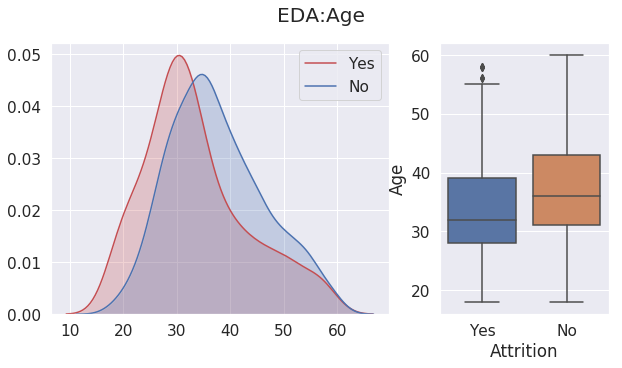

In [92]:
eda_for_features('Age',data)

#### There is a significant impact of age on the target variable(Mean of ~32 for Yes vs ~36 for No) Younger employees tend to leave the company more than the older employees do

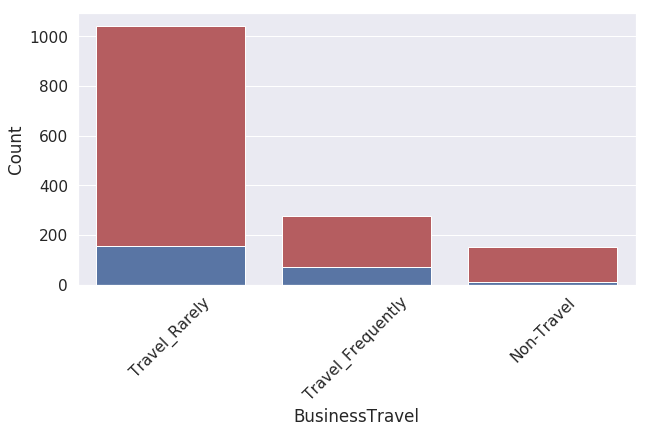

,BusinessTravel,Total,Moved_out,percentage
0,Travel_Frequently,277,69,24.91
1,Travel_Rarely,1043,156,14.96
2,Non-Travel,150,12,8.00


In [93]:
create_comparison_df('BusinessTravel',data)

#### 25% of employees who travel frequently, quit compared to 8% of those who never travel

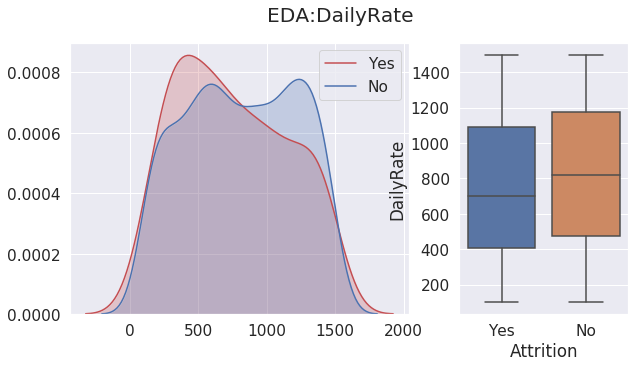

In [94]:
eda_for_features('DailyRate',data)

#### Again a considerable difference in the impact of daily rate on the output variable. A shift in the peak??

### The following features are hypothesized to have a significant impact on the target variable.

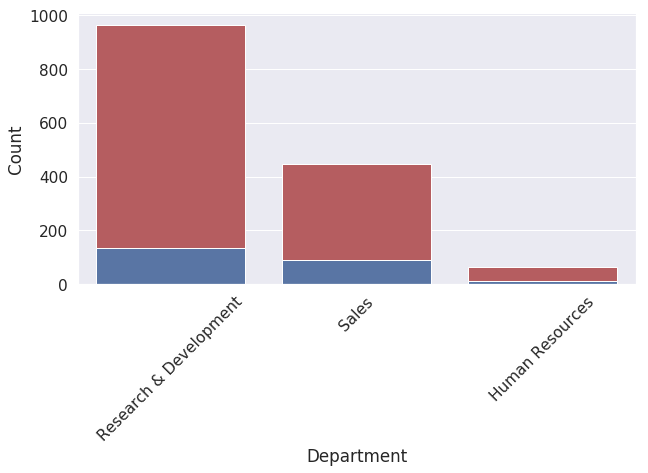

,Department,Total,Moved_out,percentage
0,Sales,446,92,20.63
1,Human Resources,63,12,19.05
2,Research & Development,961,133,13.84


In [95]:
create_comparison_df('Department',data)

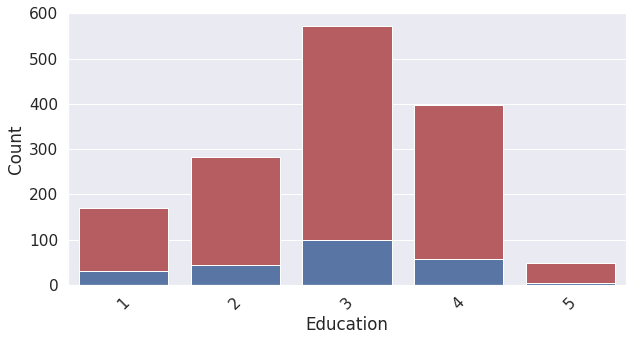

,Education,Total,Moved_out,percentage
0,1,170,31,18.24
1,3,572,99,17.31
2,2,282,44,15.60
3,4,398,58,14.57
4,5,48,5,10.42


In [96]:
create_comparison_df('Education',data)

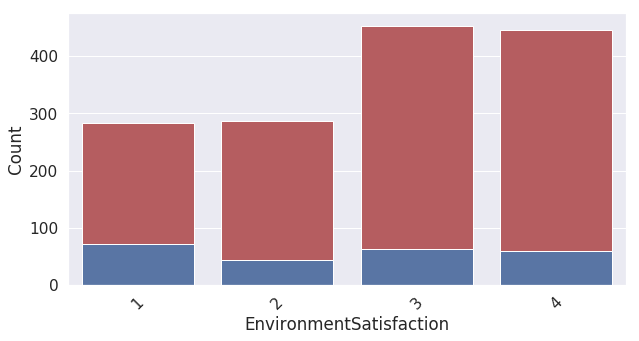

,EnvironmentSatisfaction,Total,Moved_out,percentage
0,1,284,72,25.35
1,2,287,43,14.98
2,3,453,62,13.69
3,4,446,60,13.45


In [97]:
create_comparison_df('EnvironmentSatisfaction',data)

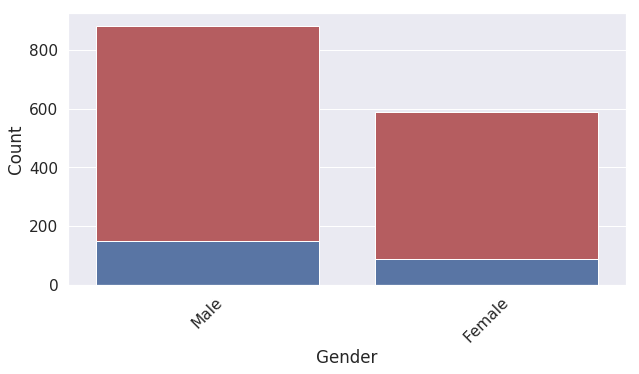

,Gender,Total,Moved_out,percentage
0,Male,882,150,17.01
1,Female,588,87,14.80


In [98]:
create_comparison_df('Gender',data)

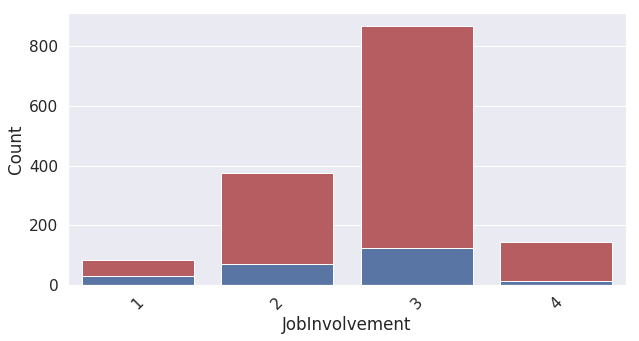

,JobInvolvement,Total,Moved_out,percentage
0,1,83,28,33.73
1,2,375,71,18.93
2,3,868,125,14.40
3,4,144,13,9.03


In [99]:
create_comparison_df('JobInvolvement',data)

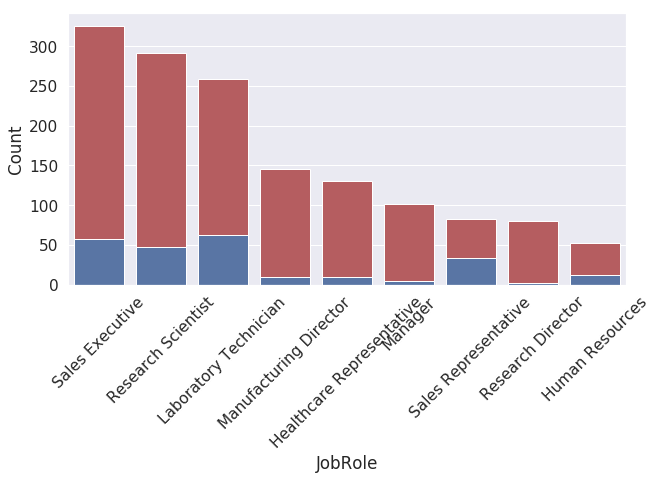

,JobRole,Total,Moved_out,percentage
0,Sales Representative,83,33,39.76
1,Laboratory Technician,259,62,23.94
2,Human Resources,52,12,23.08
3,Sales Executive,326,57,17.48
4,Research Scientist,292,47,16.10
5,Manufacturing Director,145,10,6.90
6,Healthcare Representative,131,9,6.87
7,Manager,102,5,4.90
8,Research Director,80,2,2.50


In [100]:
create_comparison_df('JobRole',data)

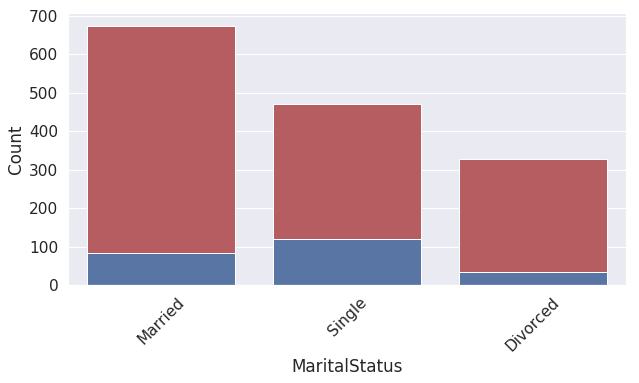

,MaritalStatus,Total,Moved_out,percentage
0,Single,470,120,25.53
1,Married,673,84,12.48
2,Divorced,327,33,10.09


In [101]:
create_comparison_df('MaritalStatus',data)

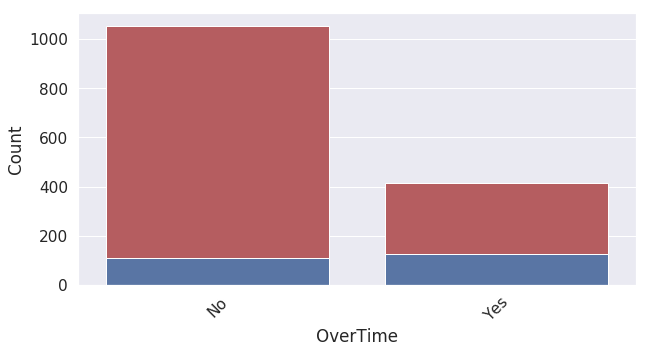

,OverTime,Total,Moved_out,percentage
0,Yes,416,127,30.53
1,No,1054,110,10.44


In [102]:
create_comparison_df('OverTime',data)

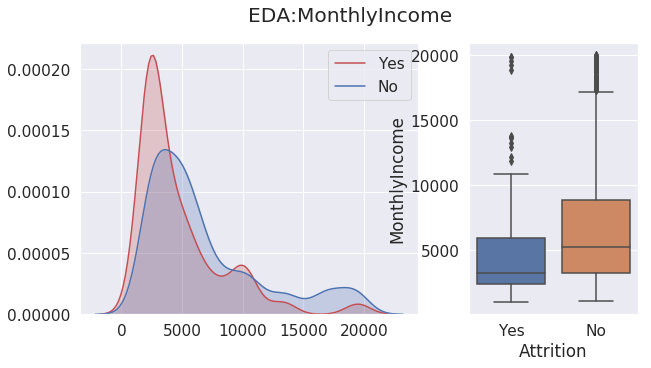

In [103]:
eda_for_features('MonthlyIncome',data)

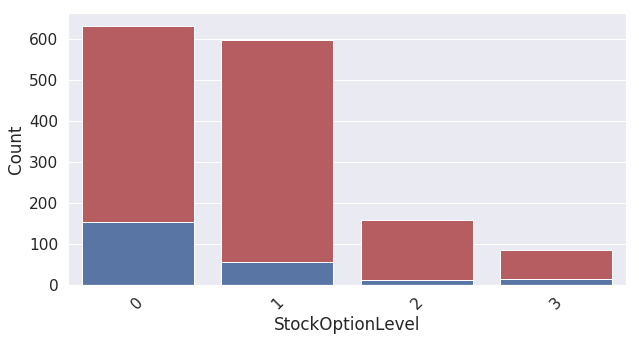

,StockOptionLevel,Total,Moved_out,percentage
0,0,631,154,24.41
1,3,85,15,17.65
2,1,596,56,9.40
3,2,158,12,7.59


In [104]:
create_comparison_df('StockOptionLevel',data)

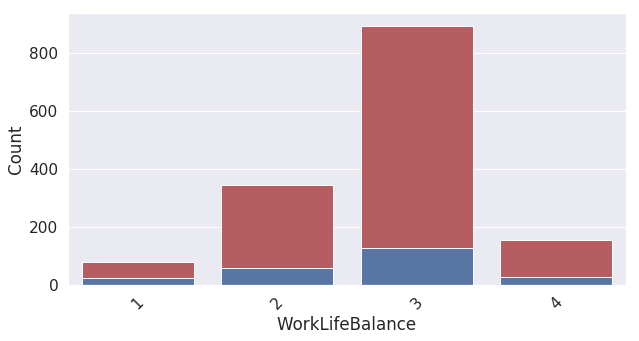

,WorkLifeBalance,Total,Moved_out,percentage
0,1,80,25,31.25
1,4,153,27,17.65
2,2,344,58,16.86
3,3,893,127,14.22


In [105]:
create_comparison_df('WorkLifeBalance',data)

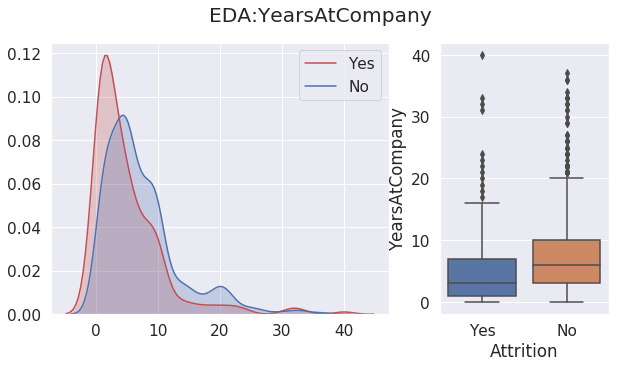

In [106]:
eda_for_features('YearsAtCompany',data)

#### Pairplot to find out the relationship between variables hypothesized to have significant impact on the target variables

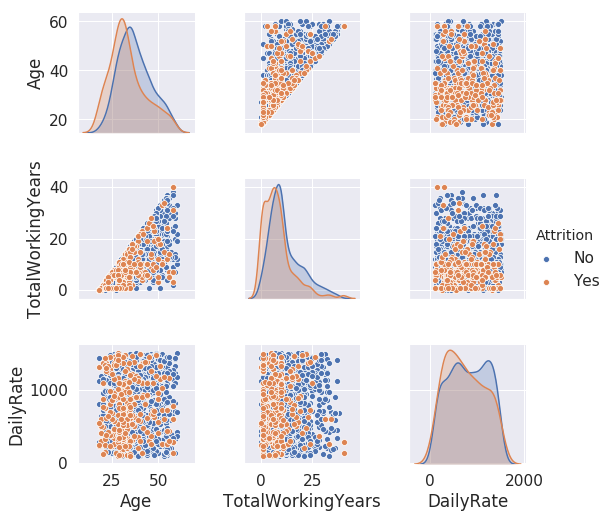

In [107]:
sns.pairplot(data[['Age','TotalWorkingYears','BusinessTravel','DailyRate','Attrition']],hue='Attrition',hue_order=["No","Yes"])

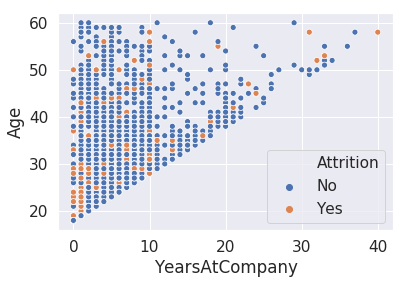

In [108]:
sns.scatterplot(x='YearsAtCompany',y='Age',data=data,hue='Attrition',hue_order=["No","Yes"])

#### Young employees who joined very recently tend to leave more than the others

### Just to know how the violin plot works

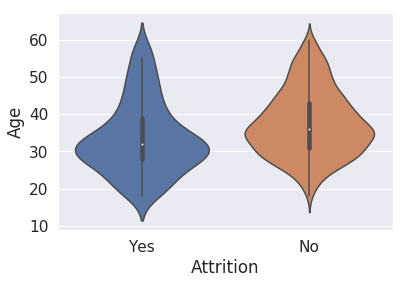

In [109]:
sns.violinplot(x='Attrition',y='Age',data=data)

In [110]:
data.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion,Attrition_num
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,0,1
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,1,0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,1
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,0


## 7. Feature Engineering
#### Create dummy features for Categorical Variables

In [111]:
categorical_variables = ['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','OverTime']
numerical_variables = [x for x in data.columns if x not in categorical_variables ]
dummy_dfs = pd.get_dummies(data[categorical_variables],drop_first=True)
final_df = pd.concat([dummy_dfs, data[numerical_variables]],axis=1)
final_df.drop(labels = ['Attrition'],inplace=True,axis=1)

In [112]:
final_df.head(5)

,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion,Attrition_num
0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,41,1102,1,2,2,94,3,2,4,5993,19479,8,11,3,1,0,8,0,1,6,0,1
1,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,49,279,8,1,3,61,2,2,2,5130,24907,1,23,4,4,1,10,3,3,10,1,0
2,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,1,37,1373,2,2,4,92,2,1,3,2090,2396,6,15,3,2,0,7,3,3,0,0,1
3,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,33,1392,3,4,4,56,3,1,3,2909,23159,1,11,3,3,0,8,3,3,8,3,0
4,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,27,591,2,1,1,40,3,1,2,3468,16632,9,12,3,4,1,6,3,3,2,2,0


In [113]:
X = final_df.iloc[:,:-1]
Y = final_df.iloc[:,-1]

### Train Test split

In [114]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=1)

### Resampling done due to class imbalance

In [115]:
X_train_u,Y_train_u = resample(X_train[Y_train==1],Y_train[Y_train==1],replace=True,
                              n_samples=X_train[Y_train==0].shape[0],random_state=1)
X_train_d,Y_train_d = resample(X_train[Y_train==0],Y_train[Y_train==0],replace=True,
                              n_samples=X_train[Y_train==1].shape[0],random_state=1)
SM = SMOTE(ratio=1.0,random_state=12)
X_train_sm,Y_train_sm = SM.fit_sample(X_train,Y_train)

X_train_u = np.concatenate((X_train[Y_train==0],X_train_u))
Y_train_u = np.concatenate((Y_train[Y_train==0],Y_train_u))
X_train_d = np.concatenate((X_train[Y_train==1],X_train_d))
Y_train_d = np.concatenate((Y_train[Y_train==1],Y_train_d))


## 6. Baseline Model

In [116]:


lr = LogisticRegression()
lr.fit(X_train_d,Y_train_d)
print(roc_auc_score(Y_test,lr.predict(X_test)))
print(classification_report(Y_test,lr.predict(X_test)))


0.7603646353646354
              precision    recall  f1-score   support

           0       0.95      0.69      0.80       364
           1       0.36      0.83      0.50        77

   micro avg       0.71      0.71      0.71       441
   macro avg       0.66      0.76      0.65       441
weighted avg       0.85      0.71      0.75       441



### Check for cross validation score for all the resampled datasets

In [117]:
datasets = {"Original":(X_train,Y_train),
            "Upsampled" :(X_train_u,Y_train_u),
             "Downsampled":(X_train_d,Y_train_d),
               "SMOTE":(X_train_sm,Y_train_sm)}
for sampling_type in datasets.keys():
    results = cross_val_score(LogisticRegression(),datasets[sampling_type][0],datasets[sampling_type][1],cv=5,scoring='f1')
    print("Cross Val Score for sampling_type:" + sampling_type )
    print(results.mean())

Cross Val Score for sampling_type:Original
0.33028261711188545
Cross Val Score for sampling_type:Upsampled
0.7720397001028768
Cross Val Score for sampling_type:Downsampled
0.7454001034972031
Cross Val Score for sampling_type:SMOTE
0.8248679889350591


## 8. Create Models
### Creating various classification models using SMOTE dataset and check their respective cross val scores

In [118]:
def cross_validation(model):
    mod= model(random_state=1)
    results = cross_val_score(mod,X_train_sm,Y_train_sm,cv=5,scoring='f1')
    print("Cross Validation F1 Score for "  + model.__name__ )
    print(results.mean())
    

In [119]:
cross_validation(RandomForestClassifier)
cross_validation(AdaBoostClassifier)
cross_validation(BaggingClassifier)
cross_validation(ExtraTreesClassifier)
cross_validation(xgb.XGBClassifier)

Cross Validation F1 Score for RandomForestClassifier
0.8689553535413868
Cross Validation F1 Score for AdaBoostClassifier
0.8209084437921712
Cross Validation F1 Score for BaggingClassifier
0.8724775989453268
Cross Validation F1 Score for ExtraTreesClassifier
0.8577543498157929
Cross Validation F1 Score for XGBClassifier
0.8500223664081868


## 9. Test Models
### Hyper Parameter Tuning

### 1.Max Depth

Depth: 1
	OOB Score:0.7779056386651323
	AUC: 0.7039210789210789
	F1: 0.789438118242466
Depth: 2
	OOB Score:0.8199079401611047
	AUC: 0.6971778221778221
	F1: 0.8047646878739806
Depth: 3
	OOB Score:0.8486766398158804
	AUC: 0.6965534465534465
	F1: 0.8158093867455027
Depth: 5
	OOB Score:0.8843498273878021
	AUC: 0.6768231768231767
	F1: 0.8246566243859883
Depth: 6
	OOB Score:0.8901035673187572
	AUC: 0.6813186813186813
	F1: 0.8363593288966423
Depth: 7
	OOB Score:0.9062140391254315
	AUC: 0.6515984015984017
	F1: 0.8247671027876483
Depth: 8
	OOB Score:0.9148446490218642
	AUC: 0.6687062937062936
	F1: 0.836482741244646
Depth: 9
	OOB Score:0.9240506329113924
	AUC: 0.651973026973027
	F1: 0.8306492748017059
Depth: 10
	OOB Score:0.9246260069044879
	AUC: 0.6232517482517482
	F1: 0.8139206753037606
Depth: 15
	OOB Score:0.9263521288837745
	AUC: 0.6041458541458542
	F1: 0.8087342709104368
Depth: 20
	OOB Score:0.9200230149597238
	AUC: 0.6041458541458542
	F1: 0.8087342709104368


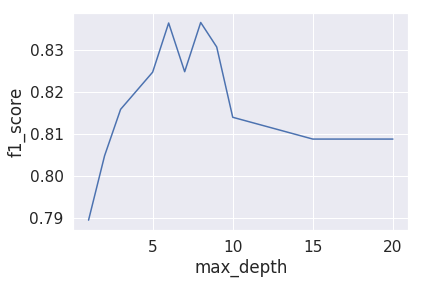

In [120]:
max_depth = [1,2,3,5,6,7,8,9,10,15,20]
f1_scores = []
for depth in max_depth:
    rf = RandomForestClassifier(n_estimators=100,random_state=1,max_depth=depth,oob_score=True)
    rf = rf.fit(X_train_sm,Y_train_sm)
    print("Depth: " + str(depth))
    print("\tOOB Score:"+ str(rf.oob_score_))
    print("\tAUC: " + str(roc_auc_score(Y_test,rf.predict(X_test))))
    print("\tF1: " +str(f1_score(Y_test,rf.predict(X_test),average='weighted')))
    f1_scores.append(f1_score(Y_test,rf.predict(X_test),average='weighted'))
    #print("\t"+ confusion_matrix(Y_test,rf.predict(X_test)))
plt.plot(max_depth,f1_scores)
plt.xlabel('max_depth')
plt.ylabel('f1_score')
plt.show()

## F1 score optimized for max depth:9

### 2. Max features option

Depth: auto
AUC: 0.651973026973027
F1: 0.8306492748017059
[[347  17]
 [ 50  27]]
Depth: sqrt
AUC: 0.651973026973027
F1: 0.8306492748017059
[[347  17]
 [ 50  27]]
Depth: log2
AUC: 0.6659590409590409
F1: 0.8328030925013684
[[343  21]
 [ 47  30]]
Depth: 0.7
AUC: 0.6201298701298702
F1: 0.8050225509890734
[[338  26]
 [ 53  24]]
Depth: 0.2
AUC: 0.6232517482517482
F1: 0.8139206753037606
[[345  19]
 [ 54  23]]


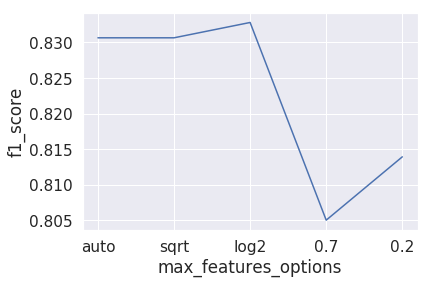

In [121]:
#max_depth = [1,2,3,5,6,7,8,9,10]
max_features_options = ["auto",  "sqrt", "log2", 0.7, 0.2]
f1_scores = []
for features in max_features_options:
#for depth in max_depth:
    rf = RandomForestClassifier(n_estimators=100,random_state=1,max_depth=9,max_features=features)
    rf = rf.fit(X_train_sm,Y_train_sm)
    print("Depth: " + str(features))
    #print("Depth: " + str(depth))
    print("AUC: " + str(roc_auc_score(Y_test,rf.predict(X_test))))
    print("F1: " +str(f1_score(Y_test,rf.predict(X_test),average='weighted')))
    print(confusion_matrix(Y_test,rf.predict(X_test)))
    f1_scores.append(f1_score(Y_test,rf.predict(X_test),average='weighted'))
plt.plot(max_features_options,f1_scores)
plt.xlabel('max_features_options')
plt.ylabel('f1_score')
plt.show()


## F1 score optimized for max features:sqrt

min_sample_leaves: 1
AUC: 0.651973026973027
F1: 0.8306492748017059
[[347  17]
 [ 50  27]]
min_sample_leaves: 2
AUC: 0.6311188811188811
F1: 0.8190187389940686
[[346  18]
 [ 53  24]]
min_sample_leaves: 3
AUC: 0.6464785214785215
F1: 0.8234103709295255
[[343  21]
 [ 50  27]]
min_sample_leaves: 5
AUC: 0.6580919080919081
F1: 0.8278855363984674
[[342  22]
 [ 48  29]]
min_sample_leaves: 6
AUC: 0.6464785214785215
F1: 0.8234103709295255
[[343  21]
 [ 50  27]]
min_sample_leaves: 7
AUC: 0.640984015984016
F1: 0.8162756872105524
[[339  25]
 [ 50  27]]
min_sample_leaves: 8
AUC: 0.666958041958042
F1: 0.8285488978342608
[[339  25]
 [ 46  31]]
min_sample_leaves: 9
AUC: 0.6618381618381618
F1: 0.8273342236200919
[[340  24]
 [ 47  30]]
min_sample_leaves: 10
AUC: 0.6683316683316683
F1: 0.8303703703703705
[[340  24]
 [ 46  31]]
min_sample_leaves: 20
AUC: 0.6624625374625376
F1: 0.817089926949082
[[331  33]
 [ 45  32]]
min_sample_leaves: 50
AUC: 0.6894355644355645
F1: 0.8240206396229625
[[327  37]
 [ 40  37]]


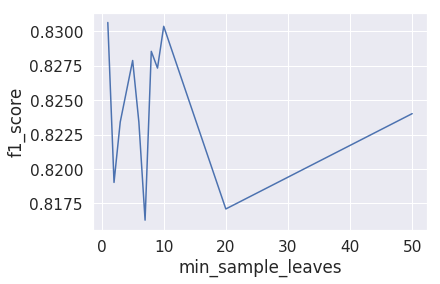

In [122]:
min_sample_leaves = [1,2,3,5,6,7,8,9,10,20,50]
f1_scores = []
for leaves in min_sample_leaves:
#for depth in max_depth:`
    rf = RandomForestClassifier(n_estimators=100,min_samples_leaf=leaves, random_state=1,max_depth=9,max_features='sqrt')
    rf = rf.fit(X_train_sm,Y_train_sm)
    print("min_sample_leaves: " + str(leaves))
    #print("Depth: " + str(depth))
    print("AUC: " + str(roc_auc_score(Y_test,rf.predict(X_test))))
    print("F1: " +str(f1_score(Y_test,rf.predict(X_test),average='weighted')))
    print(confusion_matrix(Y_test,rf.predict(X_test)))
    f1_scores.append(f1_score(Y_test,rf.predict(X_test),average='weighted'))
plt.plot(min_sample_leaves,f1_scores)
plt.xlabel('min_sample_leaves')
plt.ylabel('f1_score')
plt.show()

## F1 score optimized for min sample leaves:20

In [123]:
rf_final = RandomForestClassifier(n_estimators=100,max_features='sqrt',min_samples_leaf=20,max_depth=9,random_state=1)
rf_final.fit(X_train_sm,Y_train_sm)
print("AUC: " + str(roc_auc_score(Y_test,rf_final.predict(X_test))))
print("F1: " +str(f1_score(Y_test,rf_final.predict(X_test),average='weighted')))
print(confusion_matrix(Y_test,rf_final.predict(X_test)))


AUC: 0.6624625374625376
F1: 0.817089926949082
[[331  33]
 [ 45  32]]


### AUC Curve

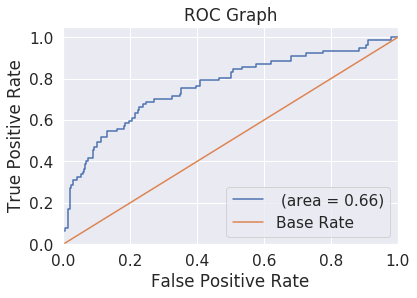

In [124]:

rf_fpr, rf_tpr, rf_thresholds  = roc_curve(Y_test, rf_final.predict_proba(X_test)[:,1])

plt.figure()



# Plot Random Forest ROC
plt.plot(rf_fpr, rf_tpr, label=' (area = %0.2f)' %roc_auc_score(Y_test, rf_final.predict(X_test)))

# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show()


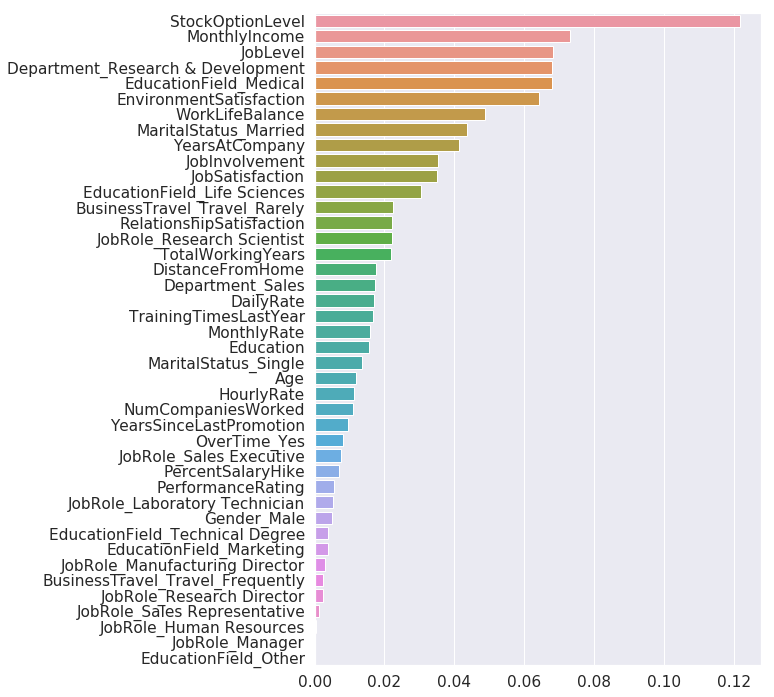

In [125]:
feature_importances = pd.Series(rf_final.feature_importances_, index=X_train.columns)
feature_importances.sort_values(inplace=True,ascending=False)
feature_importances.plot(kind='barh', figsize=(8,12),color='r')
sns.barplot(feature_importances.values, feature_importances.index )